# Sorting and Time Complexity
We have already seen an implementation of the _selection sort_ and a demonstration of the _merge sort_. Today we shall look at how to think about the _merge sort_ and consequently how to implement it.

We'll also look at the time complexities of the sorts covered.

 

In [1]:
%config InteractiveShell.ast_node_interactivity="none"

In [2]:
%run boaz_utils.ipynb

## Merge Sort

Recall the implementation of _merge sort_ from an earlier lecture.

- If the list has fewer than 2 elements it's sorted, so return it
- Otherwise:
  - split it in half
  - recursively sort each half
  - merge the sorted sublists
  - return the result of the merge

## The _merge_ process

In [3]:
def rec_merge(lst1, lst2):
    """
    Return a new list containing the elements of both in sorted order
    lst1 and lst2 must already be in sorted order.
    """
    # Let us try a purely recursive approach
    # Base case(s)
    if len(lst1) == 0:
        return lst2
    elif len(lst2) == 0:
        return lst1
    else:
    # Recursive case(s)
        e1 = lst1[0]
        e2 = lst2[0]
        if e1 < e2:
            return [e1] + rec_merge(lst1[1:], lst2)
        else:
            return [e2] + rec_merge(lst1, lst2[1:])


In [4]:
test_lst1 = [10, 19, 32, 50, 71]
test_lst2 = [8, 12, 15, 21, 33, 80]
print(rec_merge(test_lst1, test_lst2))

[8, 10, 12, 15, 19, 21, 32, 33, 50, 71, 80]


In [5]:
def iter_merge(lst1, lst2):
    """
    Return a new list containing the elements of both in sorted order
    lst1 and lst2 must already be in sorted order.
    """
    # Let us try this using for / while loops
    # What do we need to keep track of? (ie the _state_ of the computation)
    # How does it change throughout the loop?
    # How does it affect the termination of the loop?
    n1 = len(lst1)
    n2 = len(lst2)
    result = []
    i = 0  # index into lst1
    j = 0  # index into lst2
    while i < n1 and j < n2:
        e1 = lst1[i]
        e2 = lst2[j]
        if e1 <= e2:
            result.append(e1)
            i += 1
        else:
            result.append(e2)
            j += 1
    if i >= n1:
        result.extend(lst2[j:])
    else:
        result.extend(lst1[i:])
    return result
        

In [6]:
print(iter_merge(test_lst1, test_lst2))

[8, 10, 12, 15, 19, 21, 32, 33, 50, 71, 80]


Note that our recursive solution depended upon Python list slices. They are convenient to express, but if we care about performance, they might be more expensive than we can afford, because they make a copy of the segment of the list denoted by the slice.

We can still leverage the power of recursion though, by avoiding the slicing, and thinking in terms of the indices we are working with, in order to design the "wishful thinking" step. Some people refer to such a recursive function as a _helper_ function.  If you look closely enough, you will see similarities with the iterative solution. Here is an example:

In [7]:
def rec2_merge(lst1, lst2):
    """
    Return a new list containing the elements of both in sorted order
    lst1 and lst2 must already be in sorted order.
    """
    # A recursive implementation that does not use slices
    # What are the components of the _state_ of the computation?
    # What can we say is true about the state?
    n1 = len(lst1)
    n2 = len(lst2)
    def helper(i, j, result):
        if i >= n1:
            result.extend(lst2[j:])
            return result
        elif j >= n2:
            result.extend(lst1[i:])
            return result
        else:
            e1 = lst1[i]
            e2 = lst2[j]
            if e1 <= e2:
                result.append(e1)
                return helper(i+1, j, result)
            else:
                result.append(e2)
                return helper(i, j+1, result)
    return helper(0, 0, [])

In [8]:
print(rec2_merge(test_lst1, test_lst2))

[8, 10, 12, 15, 19, 21, 32, 33, 50, 71, 80]


## Variants of Merge Sort
We will implement 3 variations of _merge_sort_ to explore the impacts of the 3 implementations of _merge_ on performance.

In [9]:
def merge_sort_rec1(lst):
    """Return a list containing the elements of lst in sorted order"""
    # What are good base cases?
    # What do we do in the general case?
    n = len(lst)
    if n <= 1:
        return lst
    else:
        m = n//2
        left = lst[:m]
        right = lst[m:]
        return rec_merge(merge_sort_rec1(left), merge_sort_rec1(right))
    
def merge_sort_iter(lst):
    """Return a list containing the elements of lst in sorted order"""
    # What are good base cases?
    # What do we do in the general case?
    n = len(lst)
    if n <= 1:
        return lst
    else:
        m = n//2
        left = lst[:m]
        right = lst[m:]
        return iter_merge(merge_sort_iter(left), merge_sort_iter(right))
    
def merge_sort_rec2(lst):
    """Return a list containing the elements of lst in sorted order"""
    # What are good base cases?
    # What do we do in the general case?
    n = len(lst)
    if n <= 1:
        return lst
    else:
        m = n//2
        left = lst[:m]
        right = lst[m:]
        return rec2_merge(merge_sort_rec2(left), merge_sort_rec2(right))

In [10]:
test_list = [12, 19, 7, 3, 21, 42, 71, 31, 53]
print(merge_sort_rec1(test_list))
print(merge_sort_iter(test_list))
print(merge_sort_rec2(test_list))

[3, 7, 12, 19, 21, 31, 42, 53, 71]
[3, 7, 12, 19, 21, 31, 42, 53, 71]
[3, 7, 12, 19, 21, 31, 42, 53, 71]


## Selection Sort Revisited
Let us quickly review the implementation of the selection sort

In [11]:
def selection_sort(lst):
    def find_index_of_smallest(start):
        min_val = lst[start]
        min_idx = start
        for j, val in enumerate(lst[start:], start):
            if val < min_val:
                min_val = val
                min_idx = j
        return min_idx
        
    def swap_vals_at(idx1, idx2):
        tmp = lst[idx2]
        lst[idx2] = lst[idx1]
        lst[idx1] = tmp
        
    for i in range(len(lst)):
        j = find_index_of_smallest(i)
        swap_vals_at(i, j)
    return lst


In [12]:
print(selection_sort(test_list))

[3, 7, 12, 19, 21, 31, 42, 53, 71]


# Time Complexity
Let us compare the two sorting algorithms to see whether one always performs faster than the other.  To do this, we will rely upon some useful functions provided in the special library for this camp.

## Measuring Time
The utilities library for the camp contains function called _timefunc_ which we can use to measure both the actual time used by a function, as well as the number of steps it performs. 

In [13]:
print(timefunc(selection_sort, test_list))
print(timefunc(merge_sort_rec1, test_list))
print(timefunc(merge_sort_iter, test_list))
print(timefunc(merge_sort_rec2, test_list))

(0.0008965019951574504, 185.0, [3, 7, 12, 19, 21, 31, 42, 53, 71])
(0.0006898680003359914, 170.0, [3, 7, 12, 19, 21, 31, 42, 53, 71])
(0.0007712810183875263, 226.0, [3, 7, 12, 19, 21, 31, 42, 53, 71])
(0.0007729870267212391, 223.0, [3, 7, 12, 19, 21, 31, 42, 53, 71])


## Questions
- Why don't the times correspond to the number of steps?
- When comparing algorithm performance, should we use times or steps?
- Why can we not conclude from this output which algorithm is the "best" one?


### Time Complexity
- We will need to see how each algorithm performs over a variety of inputs.
- As the input size grows, we want to see how the time (or steps) used by the algorithm grows.
- This relationship between steps used and input size is called the _time complexity_ of the algorithm.
- Time Complexity is reported as a function
- We usually assess time complexity by analysing code
- We can also try to empirically determine it by measuring running times (or steps) on many samples

------

## Empirical Analysis
We will create some utility functions to help us make various input list sizes.

In [14]:
import random
def mk_test_list(n, low=1, hi=10**6):
    """Return a list of random integers of length n"""
    return [random.randint(low, hi) for i in range(n)]

# We will use a utility function called genintlist(n) to 
# generate a collection of lists of sizes up to n
      

In [15]:
tiny_test_list = mk_test_list(10, 1, 100)
print(f"tiny_test = {tiny_test_list}")

small_list_of_inputs = list(genintlist(10))
print(f"small list of inputs = {small_list_of_inputs}")

med_list_of_inputs = list(genintlist(100))
print("med list of inputs properties:")
print(len(med_list_of_inputs))
print(med_list_of_inputs[0])
print(len(med_list_of_inputs[-1]))

big_list_of_inputs = list(genintlist(10000))
print("big list of inputs properties:")
print(len(big_list_of_inputs))
print(big_list_of_inputs[0])
print(len(big_list_of_inputs[-1]))


tiny_test = [63, 91, 90, 92, 66, 32, 11, 6, 77, 28]
small list of inputs = [[10], [9, 1], [4, 2, 3], [9, 1, 7, 10], [7, 9, 6, 1, 4], [4, 8, 8, 10, 1, 10], [8, 10, 10, 3, 7, 6, 6], [8, 8, 7, 3, 9, 7, 8, 7], [5, 2, 8, 6, 9, 8, 9, 7, 4]]
med list of inputs properties:
20
[80]
96
big list of inputs properties:
25
[8706]
9625


In [16]:
def tabulate(algo, inps):
    stats = {}  # We'll use a dictionary to store the stats
    print(algo.__name__)
    for lst in inps:
        t, s, out = timefunc(algo, lst)
        n = len(lst)
        stats[n] = (t, s)
        print(f"n:{n}\t time:{t}\t steps:{s}")
    print()  # separator line
    return stats

In [17]:
ss_stats = tabulate(selection_sort, med_list_of_inputs)

ms_rec1_stats = tabulate(merge_sort_rec1, med_list_of_inputs)

ms_iter_stats = tabulate(merge_sort_iter, med_list_of_inputs)

ms_rec2_stats = tabulate(merge_sort_rec2, med_list_of_inputs)

selection_sort
n:1	 time:0.00015974498819559813	 steps:17.0
n:6	 time:0.00040513399289920926	 steps:107.0
n:11	 time:0.0008519419934600592	 steps:247.0
n:16	 time:0.0010354649857617915	 steps:437.0
n:21	 time:0.0012400210252963006	 steps:677.0
n:26	 time:0.0030034820083528757	 steps:967.0
n:31	 time:0.003796252014581114	 steps:1307.0
n:36	 time:0.0027680950006470084	 steps:1697.0
n:41	 time:0.0032391929998993874	 steps:2137.0
n:46	 time:0.003953495994210243	 steps:2627.0
n:51	 time:0.004748639010358602	 steps:3167.0
n:56	 time:0.005724583985283971	 steps:3757.0
n:61	 time:0.006774711015168577	 steps:4397.0
n:66	 time:0.007710543985012919	 steps:5087.0
n:71	 time:0.008428564004134387	 steps:5827.0
n:76	 time:0.009986580989789218	 steps:6617.0
n:81	 time:0.010916381026618183	 steps:7457.0
n:86	 time:0.011575376032851636	 steps:8347.0
n:91	 time:0.01328516803914681	 steps:9287.0
n:96	 time:0.01464984699850902	 steps:10277.0

merge_sort_rec1
n:1	 time:2.2724969312548637e-05	 steps:4.0
n:6	

Let also develop some utility functions for graphing results.

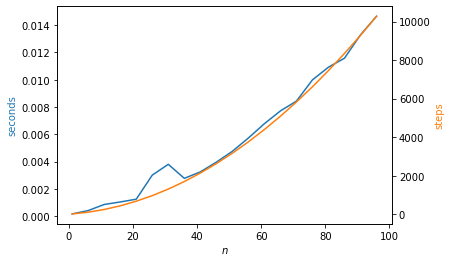

In [18]:
plot_stats(ss_stats)

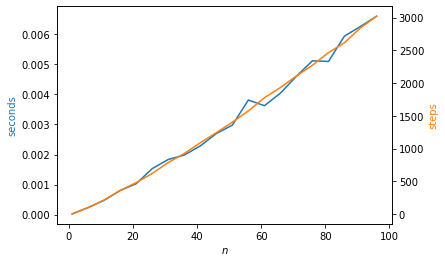

In [19]:
plot_stats(ms_rec1_stats)

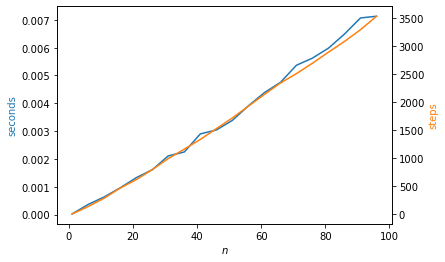

In [20]:
plot_stats(ms_iter_stats)

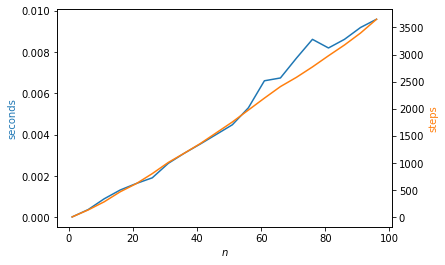

In [21]:
plot_stats(ms_rec2_stats)

These graphs help us to see how the times and the number of steps required grow with the input size, but we wanted to compare the two algorithms.

So, we will use a different function to plot all the performances on the same graph.

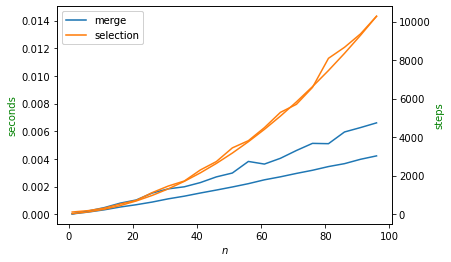

In [23]:
plot_function_times(merge_sort_rec1, 'merge', selection_sort, 'selection', size_fn=len, inps=med_list_of_inputs)

In [24]:
def graph_times(algo, n, hi=0):
    lengths = []
    times = []
    steps = []
    for lst in genintlist(n, hi):
        lengths.append(len(lst))
        t, s, ans = timefunc(algo, lst)
        times.append(t)
        steps.append(s)
    return plot_curve(lengths, times, steps, True, False)

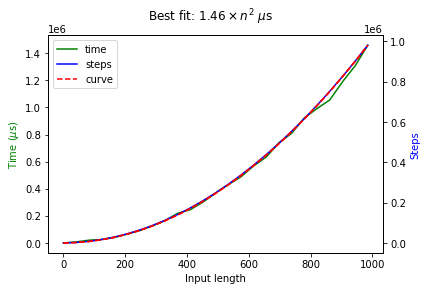

In [25]:
graph_times(selection_sort, 1000)

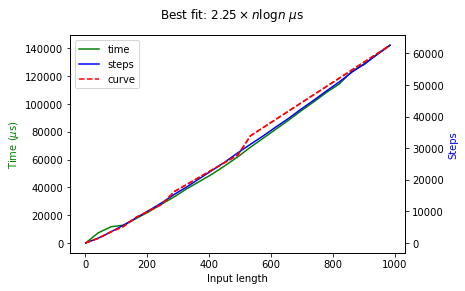

In [26]:
graph_times(merge_sort_rec1, 1000)

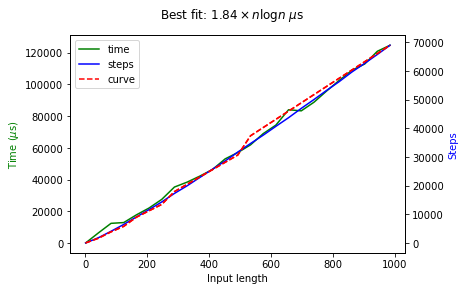

In [27]:
graph_times(merge_sort_iter, 1000)

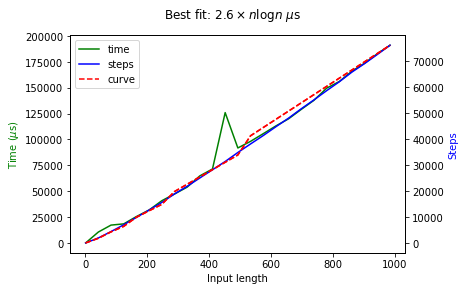

In [28]:
graph_times(merge_sort_rec2, 1000)

The interpolation functions fitted a $n^2$ curve to the number of steps needed by the selection sort and a $n \log n$ curve for the merge sort.  When we analyse the code directly, we also obtain the same results, up to order of growth.